In [28]:
from GetData.read_data import get_stock_data

In [29]:
Yum = get_stock_data('YUM')

In [30]:
print(Yum.head())

             Open     High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2017-01-03  63.56  63.7899  62.82  63.21  4793381.0          0.0          1.0   
2017-01-04  63.15  63.7950  63.07  63.44  2835207.0          0.0          1.0   
2017-01-05  63.35  63.7700  63.18  63.65  4040016.0          0.0          1.0   
2017-01-06  63.65  64.8300  63.38  64.42  2863835.0          0.0          1.0   
2017-01-09  64.38  64.8500  64.33  64.60  1944170.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2017-01-03  62.717292  62.944144  61.987103   62.371932    4793381.0  
2017-01-04  62.312728  62.949176  62.233788   62.598883    2835207.0  
2017-01-05  62.510076  62.924508  62.342330   62.806099    4040016.0  
2017-01-06  62.806099  63.970454  62.539678   63.565890    2863835.0  
2017-0

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [32]:
Yum.Open.mean()

74.04901294498382

In [33]:
binaryy = (Yum.Open > Yum.Open.mean()).astype(int)

In [34]:
print(binaryy.head())

Date
2017-01-03    0
2017-01-04    0
2017-01-05    0
2017-01-06    0
2017-01-09    0
Name: Open, dtype: int32


In [35]:
X_train, X_test, y_train, y_test = \
    train_test_split(Yum.Open, binaryy, test_size=0.2)

In [36]:
LG = LogisticRegression()

In [39]:
model = LG.fit(np.reshape(np.asarray(X_train),(-1, 1)), 
               np.reshape(np.asarray(y_train),(-1, 1)))
predictions = LG.predict(np.reshape(np.asarray(X_test),(-1,1)))

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


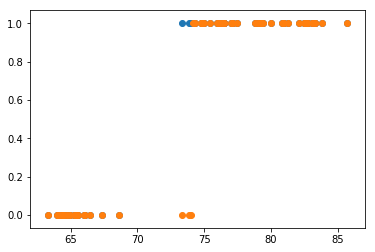

In [53]:
plt.scatter(X_test, predictions)
plt.scatter(X_test, y_test)

In [57]:
model.score(np.reshape(np.asarray(X_test),(-1,1)),np.reshape(np.asarray(y_test),(-1,1)))

0.9516129032258065